In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('posts-en-march-30.csv')
df.head(20)

,Unnamed: 0,keyword,title,author,body,time,date,status,votes,num_comments,num_comment_pages,link,lang
0,0,implemented,[Mobile] Click lyric to go to lyric time,marcosw,To be able to go to the lyric part of a song a...,02:43 AM,‎2022-02-08,NaN,311,10,1,https://community.spotify.com/t5/Implemented-I...,en
1,1,implemented,"[Mobile][Your Library] ""Spotify Playlists"" folder",Peter,Idea: Create a separate folder in Your Library...,08:52 AM,‎2022-01-04,NaN,102,10,1,https://community.spotify.com/t5/Implemented-I...,en
2,2,implemented,[AutoPlay] Option to toggle Autoplay on/off ac...,nirshtuhl,The Autoplay setting isn't working for connect...,07:39 PM,‎2021-10-26,NaN,1667,370,37,https://community.spotify.com/t5/Implemented-I...,en
3,3,implemented,[All Platforms] Support for Apple Shareplay,jtylerhartley,I would love to see Spotify adopt support for ...,07:32 PM,‎2021-10-25,NaN,106,10,1,https://community.spotify.com/t5/Implemented-I...,en
4,4,implemented,[Desktop][Playlists] Enhance Playlist on Desktop,caduceusmi7,Please introduce the Enhance Playlist on Deskt...,03:22 PM,‎2021-10-21,NaN,620,40,4,https://community.spotify.com/t5/Implemented-I...,en
5,5,implemented,"[Discover] Please add a ""Not Interested"" Button",jasonedokpa,"As the title suggests, it would be useful if S...",10:49 AM,‎2021-10-11,NaN,3630,200,20,https://community.spotify.com/t5/Implemented-I...,en
6,6,implemented,[iOS][Developer] full lyrics while listening t...,SarpG,I feel that instead of just having behind the ...,10:07 PM,‎2021-09-26,NaN,290,20,2,https://community.spotify.com/t5/Implemented-I...,en
7,7,implemented,[Desktop][Other] Let us choose to pin (or don'...,MrScottyTay,It's came to my attention that over the weeken...,09:13 AM,‎2021-08-23,NaN,468,90,9,https://community.spotify.com/t5/Implemented-I...,en
8,8,implemented,[Mobile][Other] Lyrics Sharing,arkangel-glitch,Hello! Here's my idea! One of the best parts a...,09:00 AM,‎2021-07-21,NaN,34,20,2,https://community.spotify.com/t5/Implemented-I...,en
9,9,implemented,Lyrics on Fullscreen,farisghazali,Lyrics on fullscreen would be great if you wan...,05:23 PM,‎2021-06-30,NaN,218,40,4,https://community.spotify.com/t5/Implemented-I...,en


## Tags

In [11]:
import json
with open('unofficial_platform_tags.json', 'r') as f:
    unofficial_platforms = json.load(f)
with open('unofficial_categories_tags.json', 'r') as f:
    unofficial_categories= json.load(f)

In [12]:
official_platforms = [
'Android',
'Desktop',
'iOS',
'Mobile',
'Web Player',
'Partner Platform',
'Community'
]

official_categories = [
'Browse',
'Connect',
'Developer',
'Discover',
'Friend Feed',
'Partnership',
'Playlists',
'Radio',
'Search',
'Social',
'Podcasts',
'Your Library',
'Other',
'Spotify for Artists']

In [13]:
all_platforms = official_platforms + unofficial_platforms
all_categories = official_categories + unofficial_categories

all_platforms = [p.lower() for p in all_platforms]
all_categories = [c.lower() for c in all_categories]

In [14]:
platform_tags = []
category_tags = []
len_tags = []

raw_tags = [get_tags(title) for title in df.title.values] 

for tags in raw_tags:
    platform = None
    category = None
    # ignoring any additional tags beyond 2 (see pie chart, there are very few of these)
    for tag in tags[:2]:
        if tag in all_platforms:
            if platform is None:
                platform = tag
            else:
                platform = 'Multiple'
        elif tag in all_categories:
            if category is None:
                category = tag
            else:
                category = 'Multiple'
        else:
            print("unsorted tag")
    platform_tags.append(platform)
    category_tags.append(category)
    len_tags.append(len(tags))
    
df['tags'] = raw_tags
df['len_tags'] = len_tags
df['platform_tag'] = platform_tags
df['category_tag'] = category_tags

## Keyword

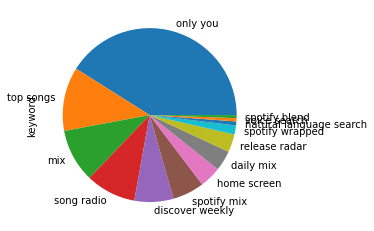

In [6]:
df.keyword.value_counts().plot(kind='pie');

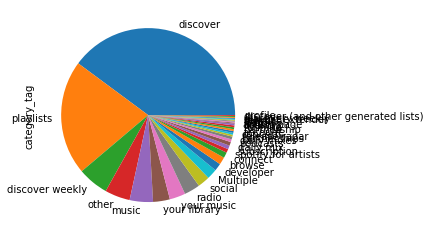

In [20]:
df_mix = df[df.keyword == 'discover weekly']
df_mix.category_tag.value_counts().plot(kind='pie');

In [22]:
df_ml = df[df.category_tag == 'machine learning']
print(df_ml.link.values[0])

https://community.spotify.com/t5/Closed-Ideas/Machine-Learning-Tag-music-with-emotional-valence/idi-p/1872641?search-action-id=299031715943&search-result-uid=1872641


## Sample

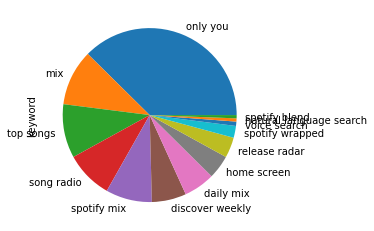

In [24]:
all_sampled_posts = df.sample(n=500, replace=False)
all_sampled_posts.keyword.value_counts().plot(kind='pie');

In [37]:
splits = np.array_split(all_sampled_posts, 4)

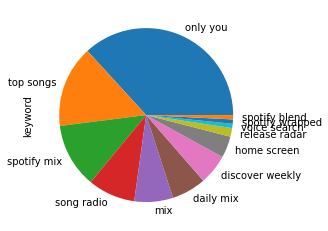

In [38]:
splits[0].keyword.value_counts().plot(kind='pie');

In [40]:
splits[0].to_csv('ryan_posts.csv')
splits[1].to_csv('ali_posts.csv')
splits[2].to_csv('charlotte_posts.csv')
splits[3].to_csv('harita_posts.csv')

In [41]:
[len(x) for x in splits]

[125, 125, 125, 125]

## Statuses

In [299]:
# https://datascience.stackexchange.com/questions/57853/group-small-values-in-a-pie-chart
import itertools
import matplotlib.pyplot as plt

def plot_with_other(counts, threshold=270):
    dic = counts.to_dict()
    newdic={}
    for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<threshold) else k):
         newdic[key] = sum([dic[k] for k in list(group)])   

    labels = newdic.keys()
    sizes = newdic.values()

    fig, ax = plt.subplots()

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
    ax.axis('equal')
    plt.tight_layout()

    plt.show()

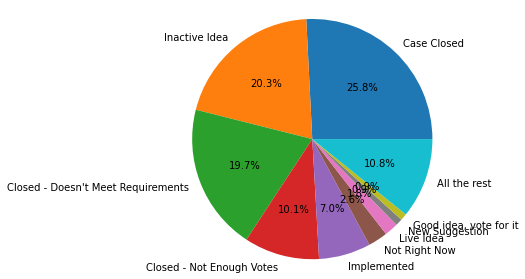

In [300]:
plot_with_other(df.status.value_counts(), threshold=30)

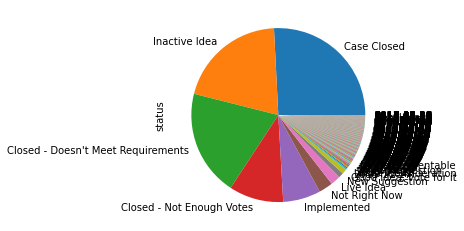

In [301]:
df_status = df.status.value_counts()
# df_status[df_status <= 1000] = 1000
#  = df_status[df_status. <= 1000 

# dft_subset1 =  dft[dft['Value'] <= threshold]
# dft_subset2 =  dft[dft['Value'] > threshold]


df.status.value_counts().plot(kind='pie');

## Tags

In [8]:
import re

def get_tags(title):
    tags = re.findall('\[[^\[\]]*\]',title)
    tags = [tag[1:-1].lower() for tag in tags]
    return tags

def remove_tags(title):
    return re.sub('\[[^\[\]]*\] ',"",title)

In [9]:
platform_tags = []
category_tags = []
len_tags = []

raw_tags = [get_tags(title) for title in df.title.values] 

for tags in raw_tags:
    platform = None
    category = None
    # ignoring any additional tags beyond 2 (see pie chart, there are very few of these)
    for tag in tags[:2]:
        if tag in all_platforms:
            if platform is None:
                platform = tag
            else:
                platform = 'Multiple'
        elif tag in all_categories:
            if category is None:
                category = tag
            else:
                category = 'Multiple'
        else:
            print("unsorted tag")
    platform_tags.append(platform)
    category_tags.append(category)
    len_tags.append(len(tags))
    
df['tags'] = raw_tags
df['len_tags'] = len_tags
df['platform_tag'] = platform_tags
df['category_tag'] = category_tags

NameError: name 'all_platforms' is not defined

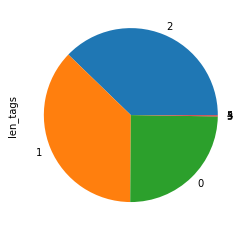

In [305]:
df.len_tags.value_counts().plot(kind='pie');

/home/marten4/anaconda3/envs/grit-3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/marten4/anaconda3/envs/grit-3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/marten4/anaconda3/envs/grit-3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 29256 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/marten4/anaconda3/envs/grit-3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)


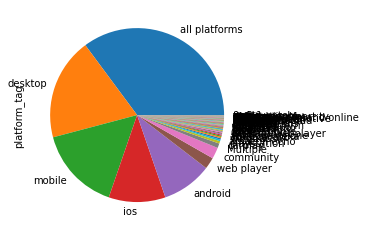

In [306]:
df.platform_tag.value_counts().plot(kind='pie');

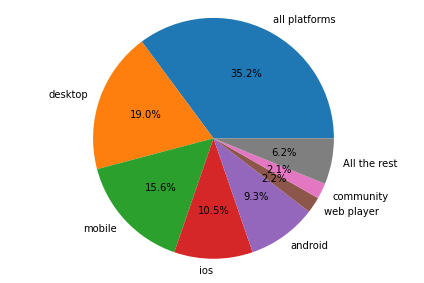

In [307]:
plot_with_other(df.platform_tag.value_counts(), threshold=100)

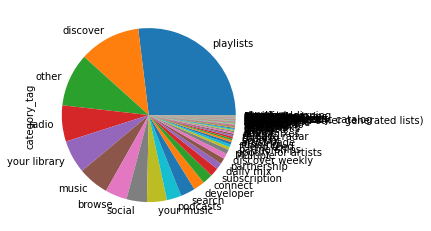

In [308]:
df.category_tag.value_counts().plot(kind='pie');

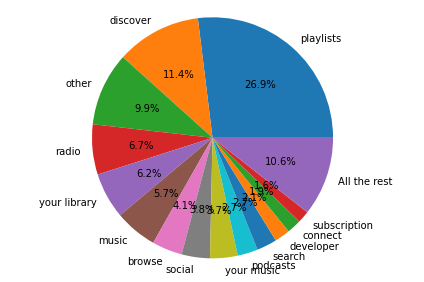

In [309]:
plot_with_other(df.category_tag.value_counts(), threshold=100)

## Creating Tags

In [47]:
df.head(1).title.values[0]

'[Your Music] Spotify Wrapped: Releases the Statistics weekly'

In [44]:
get_tags(df.head(1).title.values[0])

['Your Music']

In [46]:
remove_tags(df.head(1).title.values[0])

'Spotify Wrapped: Releases the Statistics weekly'

In [75]:
raw_tags = [get_tags(title) for title in df.title.values] 

In [206]:
# all_tags = []
# tag_lens = []
# for tags in raw_tags:
#     tag_lens.append(len(tags))
#     for i, tag in enumerate(tags):
#         all_tags.append(tag)
        
# df_tags = pd.DataFrame({"Tags":all_tags})
# df_tags.Tags.unique()

In [207]:
# df_tags.nunique()

### Separate out platform vs product category tags

In [145]:
official_platforms = [
'Android',
'Desktop',
'iOS',
'Mobile',
'Web Player',
'Partner Platform',
'Community'
]

official_categories = [
'Browse',
'Connect',
'Developer',
'Discover',
'Friend Feed',
'Partnership',
'Playlists',
'Radio',
'Search',
'Social',
'Podcasts',
'Your Library',
'Other',
'Spotify for Artists']

In [133]:
unsorted_tags = []
for tag in df_tags.Tags.unique():
    if tag not in official_platforms and tag not in official_categories:
        unsorted_tags.append(tag)
        
unsorted_tags

['Your Music',
 'All Platforms',
 'Wrapped',
 'Music',
 'null',
 'Kids',
 'Artist Page',
 'Amazon Alexa',
 'Account',
 'Audiobooks',
 'Blend',
 'Subscription',
 'Security',
 'Apple TV',
 'CarPlay',
 'Android TV',
 'Partnerships',
 'Playstation',
 'Fire TV',
 'Queue',
 'Parternship',
 'Charts',
 'Release Radar',
 'Playlist',
 'Carplay',
 'ALL PLATFORMS',
 'solution inside',
 'Notifications',
 'Mac',
 'iPad',
 'Top 50',
 'all platforms',
 'Artists',
 'Bug',
 'playstation 4',
 'Accounts',
 'Desktop/Webplayer',
 'Daily Mix',
 'Amazon Echo',
 'Volvo',
 'Profile',
 'Daily Mixes',
 'Windows',
 'Discover Weekly',
 'Tizen',
 'Andriod',
 'Wear OS',
 'Tinder',
 'Running',
 'Following',
 'Instagram',
 'History',
 'Call Center',
 'Android Auto',
 'Country',
 'Free',
 'iPhone',
 'API',
 'Release radar',
 'Android Automotive',
 'NOW',
 'Facebook',
 'Shows',
 'TV',
 'Privacy',
 'Smart TV',
 '0.8.8',
 'XBOX ONE',
 'Artists Page',
 'Playlist Extender',
 'Ads',
 'Discovery',
 'Design',
 'Devices Page',
 

In [136]:
unofficial_platforms = []
unofficial_categories = []

i = 0
while i < len(unsorted_tags):
    tag = unsorted_tags[i]
    i += 1
    print(f"'{tag}' --> ", end='')
    x = input()
    if x == 'p':
        unofficial_platforms.append(tag)
    elif x == 'c':
        unofficial_categories.append(tag)
    elif x == 'oops':
        print("Going back.....")
        i -= 2
    else: 
        print("ERROR: type 'p' for platform or 'c' for category")
        i -= 1

'Your Music' --> c
'All Platforms' --> p
'Wrapped' --> c
'Music' --> c
'null' --> c
'Kids' --> c
'Artist Page' --> c
'Amazon Alexa' --> p
'Account' --> c
'Audiobooks' --> c
'Blend' --> c
'Subscription' --> c
'Security' --> c
'Apple TV' --> p
'CarPlay' --> p
'Android TV' --> p
'Partnerships' --> c
'Playstation' --> p
'Fire TV' --> p
'Queue' --> c
'Parternship' --> c
'Charts' --> c
'Release Radar' --> c
'Playlist' --> c
'Carplay' --> p
'ALL PLATFORMS' --> p
'solution inside' --> c
'Notifications' --> c
'Mac' --> p
'iPad' --> p
'Top 50' --> c
'all platforms' --> p
'Artists' --> c
'Bug' --> c
'playstation 4' --> p
'Accounts' --> c
'Desktop/Webplayer' --> p
'Daily Mix' --> c
'Amazon Echo' --> p
'Volvo' --> p
'Profile' --> c
'Daily Mixes' --> c
'Windows' --> p
'Discover Weekly' --> c
'Tizen' --> p
'Andriod' --> p
'Wear OS' --> p
'Tinder' --> p
'Running' --> c
'Following' --> c
'Instagram' --> p
'History' --> c
'Call Center' --> c
'Android Auto' --> p
'Country' --> c
'Free' --> c
'iPhone' -->

In [288]:
all_platforms = official_platforms + unofficial_platforms
all_categories = official_categories + unofficial_categories

all_platforms = [p.lower() for p in all_platforms]
all_categories = [c.lower() for c in all_categories]

In [163]:
all_tags = []
tags_meta = []

for tags in raw_tags:
    for i, tag in enumerate(tags):
        all_tags.append(tag)
        if tag in all_platforms: 
            tags_meta.append("platform")
        elif tag in all_categories:
            tags_meta.append("category")
        else:
            print("UNSORTED TAG: ", tag)
        
df_tags_2 = pd.DataFrame({"Tags":all_tags, 'Meta':tags_meta})

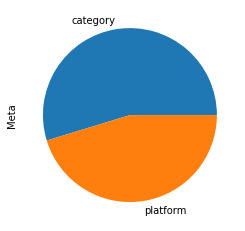

In [166]:
df_tags_2.Meta.value_counts().plot(kind='pie');

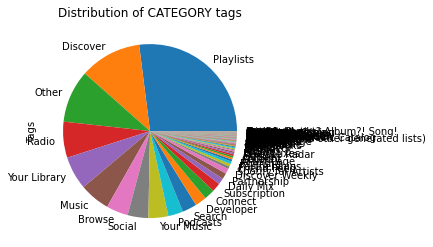

In [167]:
df_tags_category = df_tags_2[df_tags_2.Meta == 'category']
df_tags_category.Tags.value_counts().plot(kind='pie', title="Distribution of CATEGORY tags");

/home/marten4/anaconda3/envs/grit-3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/marten4/anaconda3/envs/grit-3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/marten4/anaconda3/envs/grit-3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 29256 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/marten4/anaconda3/envs/grit-3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)


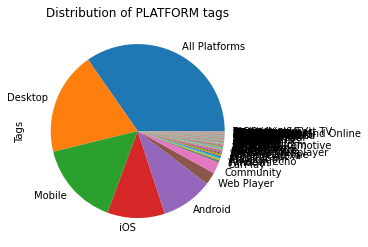

In [168]:
df_tags_platform = df_tags_2[df_tags_2.Meta == 'platform']
df_tags_platform.Tags.value_counts().plot(kind='pie',  title="Distribution of PLATFORM tags");

In [169]:
# import json
# with open('unofficial_platform_tags.json', 'w') as outfile:
#     json.dump(unofficial_platforms, outfile)
# with open('unofficial_categories_tags.json', 'w') as outfile:
#     json.dump(unofficial_categories, outfile)

## Links

In [172]:
df.head(1).link.values[0]

'https://community.spotify.com/t5/Live-Ideas/Your-Music-Spotify-Wrapped-Releases-the-Statistics-weekly/idi-p/4308312?search-action-id=299038537085&search-result-uid=4308312'